In [62]:
import numpy as np
import matplotlib.pyplot as plt
import random

from module_class import Node, UnstableNode, Center, NegCenter
from landscape_class import Landscape
from landscape_visuals import *
from morphogen_regimes import *

# %load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Node at (-1.5, 0.0), a = 1.5, s = 1.0
Node at (1.5, 0.0), a = 2.0, s = 0.8
UnstableNode at (0.0, 1.0), a = 1.3, s = 0.8
Landscape with modules:
Node at (-1.5, 0.0), a = 1.5, s = 1.0,
Node at (1.5, 0.0), a = 2.0, s = 0.8,
UnstableNode at (0.0, 1.0), a = 1.3, s = 0.8


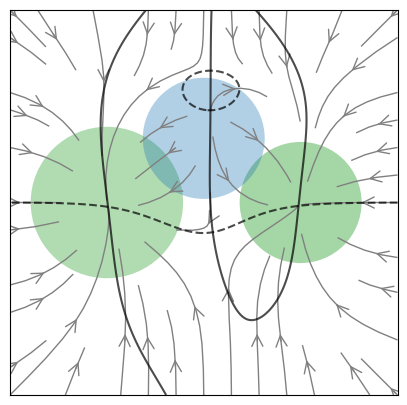

In [41]:
# Landscape with one regime + simple visualization

M1 = Node(x=-1.5, y=0., a=1.5, s=1.)
M2 = Node(x=1.5, y=0., a=2., s=0.8)
M3 = UnstableNode(x=0., y=1., a=1.3, s=0.8)

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.05, regime=mr_const, n_regimes=1)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')


Node at (-1.5, 0.0), a = [1.5 2. ], s = [1.  0.6]
Node at (1.5, 0.0), a = [2. 2.], s = [0.5 1.2]
UnstableNode at (0.0, 1.0), a = [1.3 1.4], s = [0.8 0.5]
Landscape with modules:
Node at (-1.5, 0.0), a = [1.5 2. ], s = [1.  0.6],
Node at (1.5, 0.0), a = [2. 2.], s = [0.5 1.2],
UnstableNode at (0.0, 1.0), a = [1.3 1.4], s = [0.8 0.5]


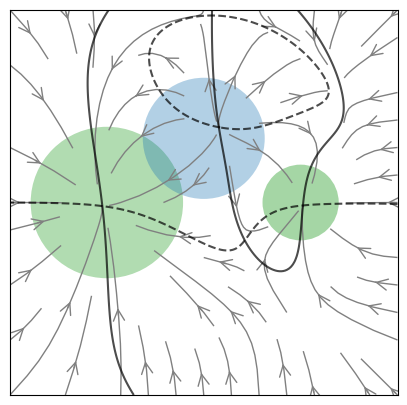

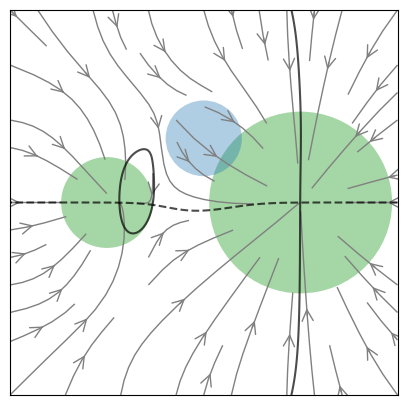

In [46]:
# Landscape with two regimes (piecewise) 

M1 = Node(x=-1.5, y=0., a=(1.5, 2.), s=(1., 0.6))
M2 = Node(x=1.5, y=0., a=(2., 2.), s=(0.5, 1.2))
M3 = UnstableNode(x=0., y=1., a=(1.3, 1.4), s=(0.8, 0.5))

module_list = [M1, M2, M3]

for M in module_list:
    print(M)

l = Landscape(module_list, A0 = 0.005, regime=mr_piecewise, n_regimes=2)
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape(l, xx, yy, regime=0, color_scheme='fp_types')
fig = visualize_landscape(l, xx, yy, regime=1, color_scheme='fp_types')


Landscape with modules:
Node at (0.0, 0.0), a = [1.5 1.5], s = [2. 2.], tau = 1.0,
UnstableNode at (0.0, 0.0), a = [2. 0.], s = [1.3 1. ], tau = 1.0,
Center at (0.0, 0.0), a = [1. 1.], s = [2.2 2.2], tau = 1.0


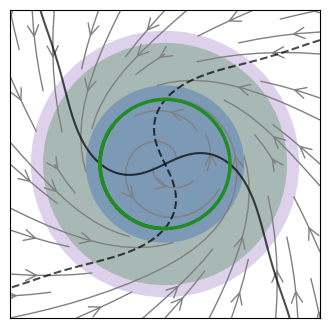

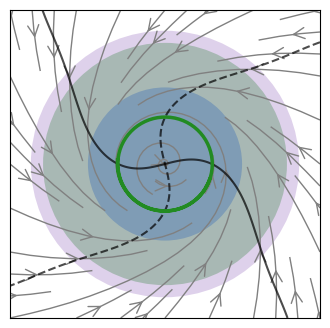

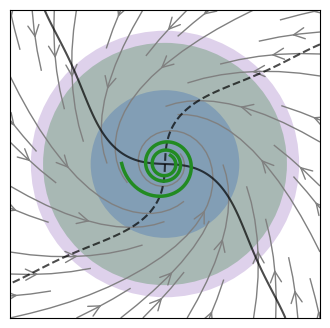

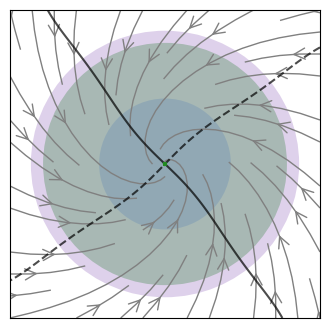

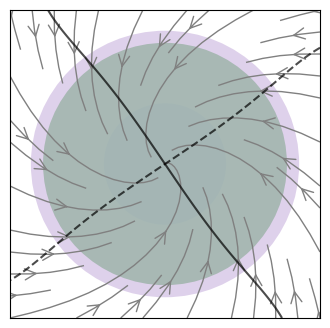

In [56]:
# Landscape with two regimes (sigmoid) + visulization of timepoints with trajectory 
# (Hopf bifurcation)

M1 = Node(0., 0., (1.5, 1.5), (2., 2.), tau=1.)
M2 = UnstableNode(0., 0., (2., 0), (1.3, 1.0), tau=1.)
M3 = Center(0., 0., (1., 1.), (2.2, 2.2), tau=1.)

module_list = [M1, M2, M3]

l = Landscape(module_list, A0 = 0.01, regime=mr_sigmoid, n_regimes=2, morphogen_times=(0.,))
print(l)

L = 3.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

fig = visualize_landscape_t(l, xx, yy, -5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -2., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, -1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=30)
fig = visualize_landscape_t(l, xx, yy, 1., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)
fig = visualize_landscape_t(l, xx, yy, 5., color_scheme='fp_types', traj_times=(0., 20., 201), traj_init_cond=(2.,2.), traj_start=100)



Landscape with modules:
Node at (-0.99752, 1.38041), a = [0.91184 1.35545 2.83723], s = [1.07327 1.17448 1.36369],
Node at (0.18739, 0.57786), a = [0.57583 0.90273 2.60203], s = [1.39927 1.42384 0.91333],
Node at (2.05142, -2.43136), a = [1.2835  1.69481 0.71934], s = [1.2926  1.26746 0.70955],
Node at (2.71544, -1.6142), a = [2.39624 2.07958 1.00768], s = [1.02905 0.62132 1.1361 ],
Node at (2.53579, -2.36725), a = [2.25988 2.09271 1.22886], s = [0.57944 0.8852  0.92885]


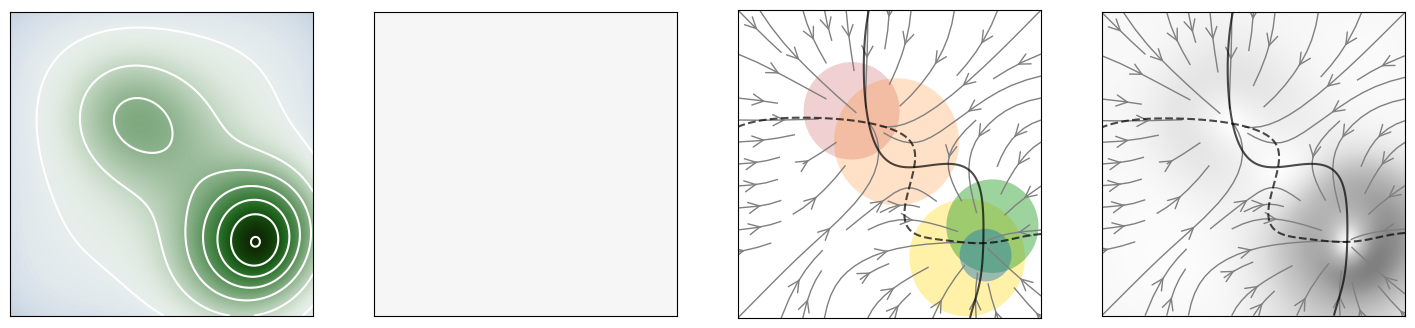

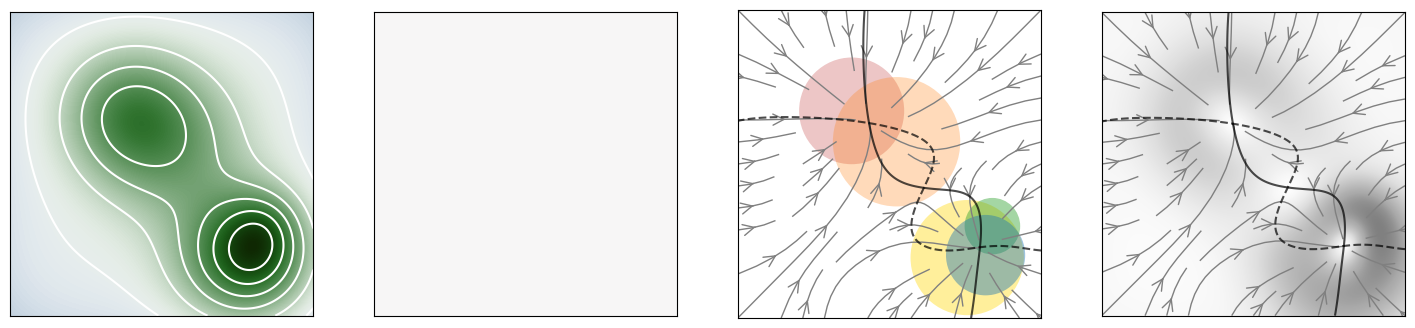

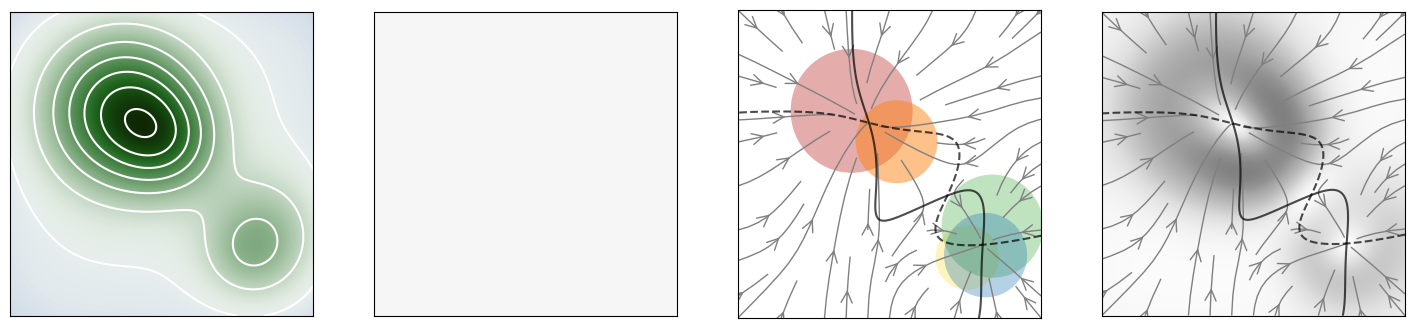

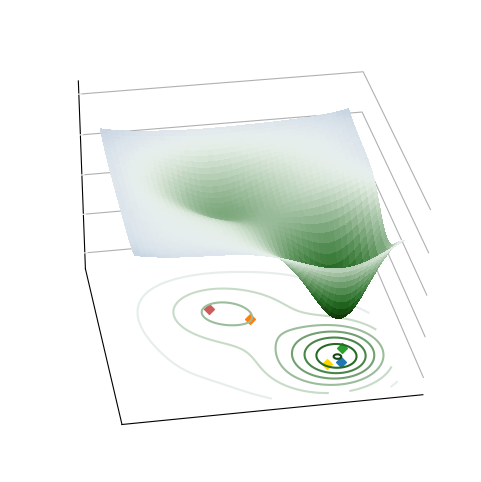

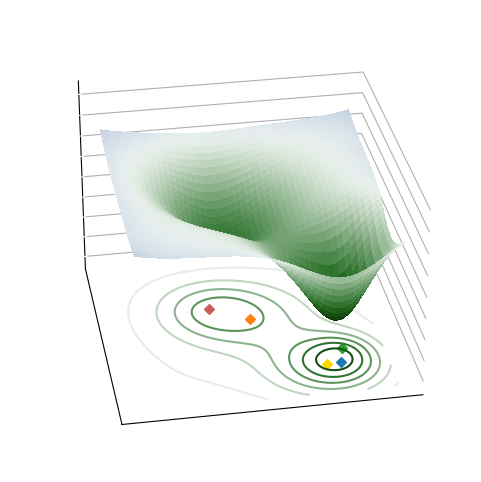

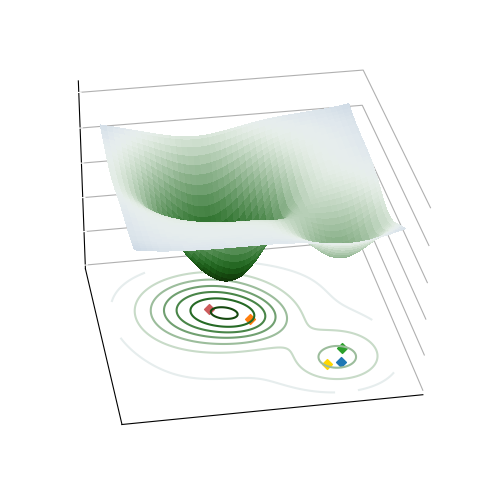

In [143]:
# Random generation of a landscape with node modules (piecewise 3 regimes)
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 3.),
    's': (0.5, 1.5),
}

par_choice_values = {}

used_fp_types = (Node,)
n_modules = 5
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q, indexing = 'xy')
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

dX, dY = visualize_all(landscape, xx,yy,times, color_scheme='order', plot_traj=False)

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 1, azim=-100, color_scheme='order', cmap_center=0., scatter=True)
fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='order', cmap_center=0., scatter=True)

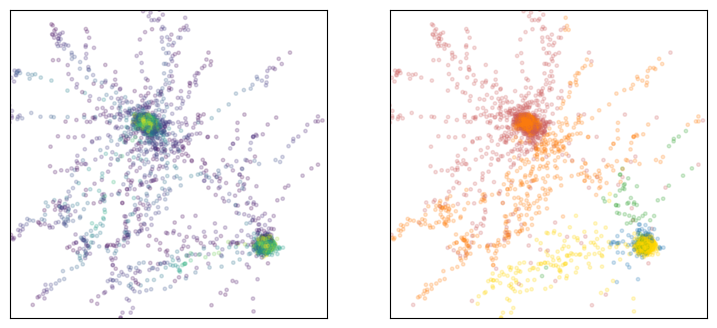

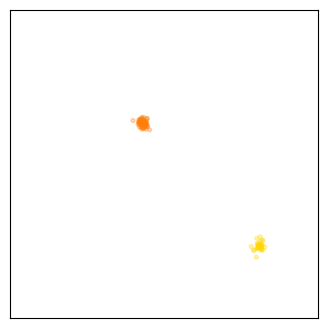

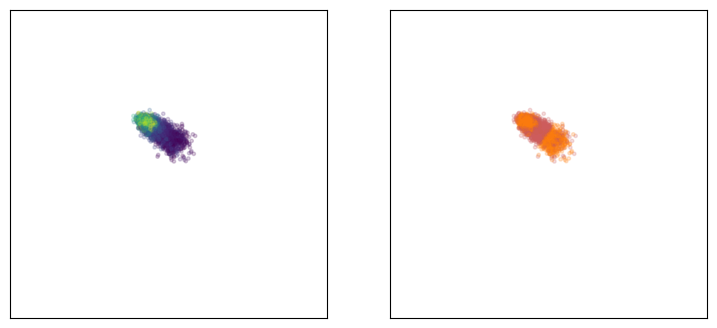

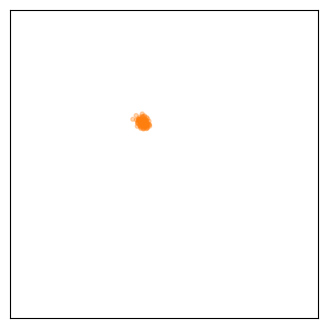

In [147]:
#  Add cells with a scattered initial condition and plot trajectories
n = 100
landscape.init_cells(n, (0., 0.), noise=2.)
get_and_plot_traj(landscape, 0, 10., 51, L, noise=0.2, frozen=False, ndt=50)

# plot final states
plot_cells(landscape, L)

# Cells starting around module i
i = 1
landscape.init_cells(n, i, noise=0.2)
get_and_plot_traj(landscape, 0, 10., 51, L, noise=0.2, frozen=False, ndt=50)

plot_cells(landscape, L)


Landscape with modules:
Node at (2.69122, 2.1982), a = [1.10505 2.93543 2.81503], s = [1.17289 0.90443 1.19985],
Node at (-1.85775, -0.3679), a = [2.98557 2.72369 2.92537], s = [0.66648 0.86358 0.50416],
Node at (1.31635, 2.12248), a = [0.9017  2.34095 1.52093], s = [1.06762 1.35099 1.32207],
NegCenter at (0.04215, -2.51373), a = [1.85581 0.65795 0.99101], s = [1.21892 1.08373 0.69434],
Node at (0.07128, 2.49965), a = [2.5557  1.82121 1.9964 ], s = [0.84497 0.71774 0.58004],
Center at (2.11998, -0.31076), a = [1.32392 1.67878 1.65255], s = [0.84943 0.78153 0.77933],
Center at (-2.82064, -2.76553), a = [1.03972 2.40877 0.6177 ], s = [1.05114 1.28816 0.65458]


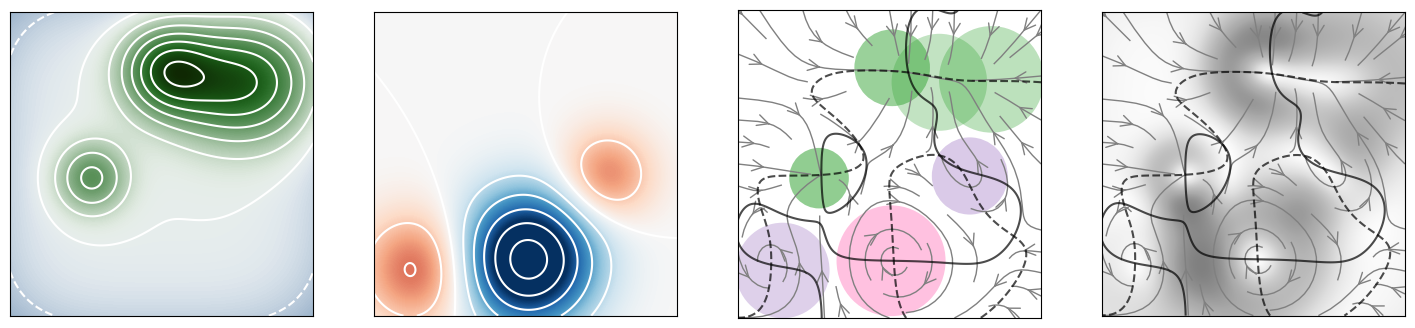

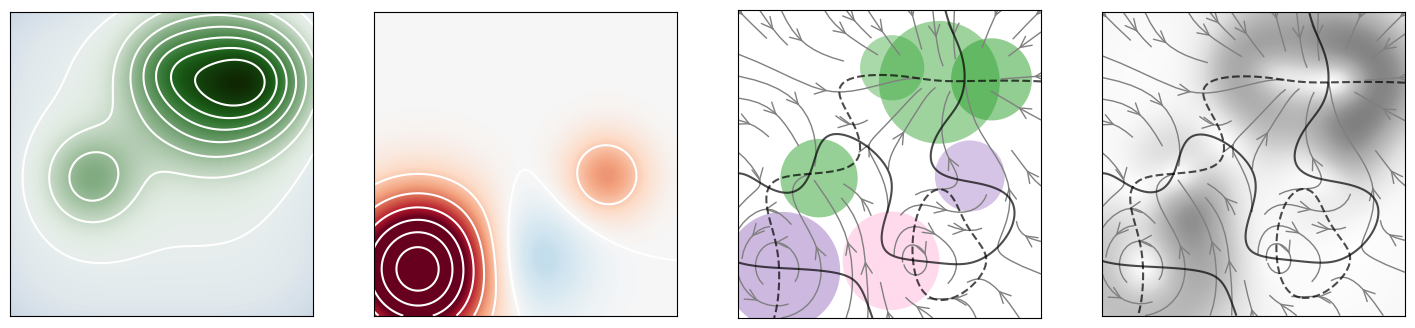

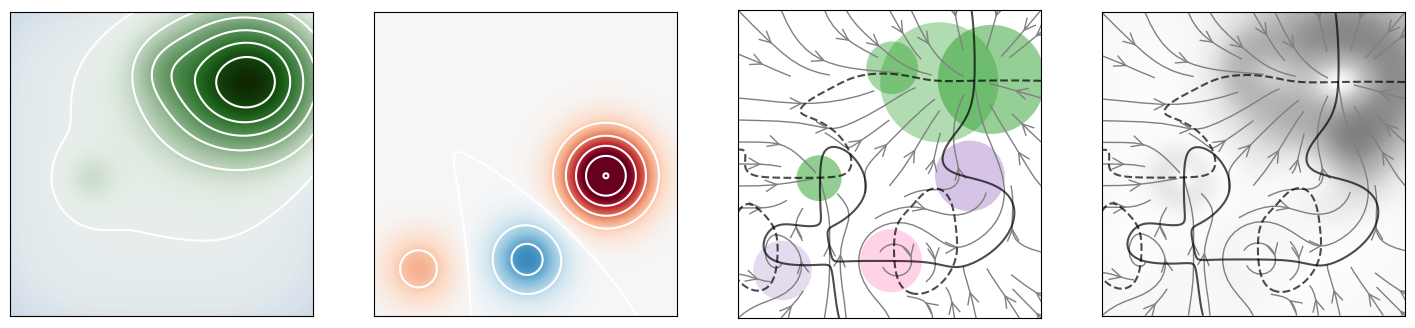

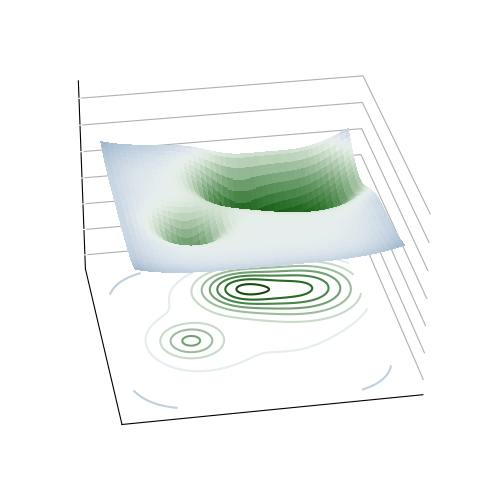

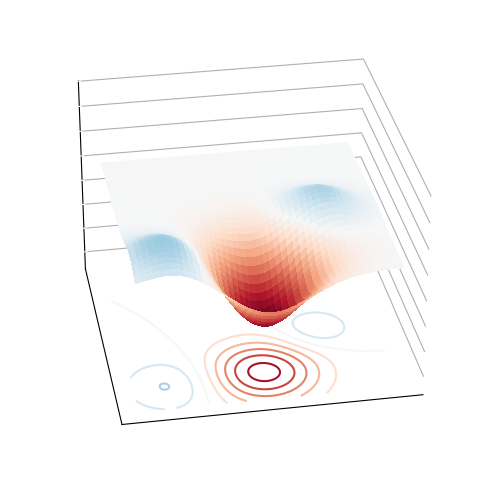

In [140]:
# Random generation of a landscape with gradient and curl modules (piecewise 3 regimes)
par_limits = {
    'x': (-3.,3.),
    'y': (-3., 3.),
    'a': (0.5, 3.),
    's': (0.5, 1.5),
}

par_choice_values = {}

used_fp_types = (Node, UnstableNode, Center, NegCenter)
n_modules = 7
start_module_list = [random.choice(used_fp_types).generate(par_limits,par_choice_values,
                                                           immutable_pars_list=[], n_regimes=3) for i in range(n_modules)]

landscape = Landscape(start_module_list, regime=mr_piecewise, morphogen_times=(2., 4.), A0=0.005)
print(landscape)

L = 4.
npoints = 401
q = np.linspace(-L, L, npoints)
times = np.asarray((0., 3., 5.))   # timepoints at which to plot 

dX, dY = visualize_all(landscape, xx,yy,times, color_scheme='fp_types', plot_traj=False)

fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False)
fig = visualize_potential(landscape, xx, yy, 0, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=False, rot=True)
# fig = visualize_potential(landscape, xx, yy, 2, azim=-100, color_scheme='fp_types', cmap_center=0., scatter=True)